In [ ]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

In [ ]:
from Zoro import *
from functions import *
from Zoro_MD import * 
from help_function import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [ ]:
mpl.style.use('seaborn')

In [ ]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
noiseamp = 0.001
#noiseamp = 0 
decay_factor=0.5
x_star=tools.sparse_vector(n=n,s=s)
#x_star=tools.vecteur_sparse_support_S(n=n,s=s)
A=np.random.normal(size=(n,n)) # Simulate a Gaussian Matrix for the norm_with_a_Gaussian_matrix function
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
#obj_func=square_of_the_difference_support_S(n,x_star,noiseamp)
obj_func=norm_with_a_Gaussian_matrix(n,x_star,noiseamp,A)
# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
#xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":0.5, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [ ]:
#IHT set up 
lamda_IHT=10 # lambda initialisation 
threshold_IHT=0.01 # lambda threshold
C_IHT=0.9 # The update param for the lambda_k at each itteration.  
step_IHT=1/3*n# The step of the IHT algo 
itt_IHT=40  # The maximum number of itterations for the IHT algo



In [ ]:
#ISTA set up 
lamda_ISTA=10 # lambda initialisation 
threshold_ISTA=0.01 # lambda threshold
C_ISTA=0.9 # The update param for the lambda_k at each itteration.  
step_ISTA=1/(3*n) # The step of the IHT algo 
itt_ISTA=40  # The maximum number of itterations for the IHT algo



In [ ]:
# IHT classique set up
itt_IHT_cla=40
setp_IHT_cla=0.5
s_IHT=sparsity

In [ ]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),x_star=x_star)
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT_cla,step_IHT=setp_IHT_cla)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)
opt_ista_ad  = ZORO(x0, obj_func, params,algo='ISTA_ad', function_budget= int(1e6),threshold_ista=threshold_ISTA,C_ista=C_ISTA,lamda_ista=lamda_ISTA,itt_ista=itt_ISTA,step_ista=step_ISTA)
# the actual optimization routine
termination=False

# Perform the original Zoro algorithm with different methods for estimating the gradient

In [ ]:
performance_log_ZORO_Co,cost_Co=opt_Co.Zoro()

In [ ]:
performance_log_ZORO_IHT_ad,cost_IHT_ad=opt_IHT_ad.Zoro()

In [ ]:
performance_log_ZORO_IHT,cost_IHT=opt_IHT.Zoro()

In [ ]:
performance_log_ZORO_Lasso,cost_Lasso=opt_Lasso.Zoro()

In [ ]:
performance_log_ZORO_DLasso,cost_DLasso=opt_DLasso.Zoro()

# Perform the Zoro algorithm with MD and different methods for estimating the gradient

In [ ]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Lass_MD  = ZORO_MD(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso_MD  = ZORO_MD(x0, obj_func, params,algo='DLasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)

In [ ]:
performance_log_ZORO_Co_MD,cost_Co_MD=opt_Co_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_IHT_MD,cost_IHT_MD=opt_IHT_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_Lasso_MD,cost_Lasso_MD=opt_Lass_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_IHT_ad_MD,cost__IHT_ad_MD=opt_IHT_ad_MD.Zoro_MD()


In [ ]:
performance_log_ZORO_DLasso_MD,cost_DLasso_MD=opt_DLasso_MD.Zoro_MD()

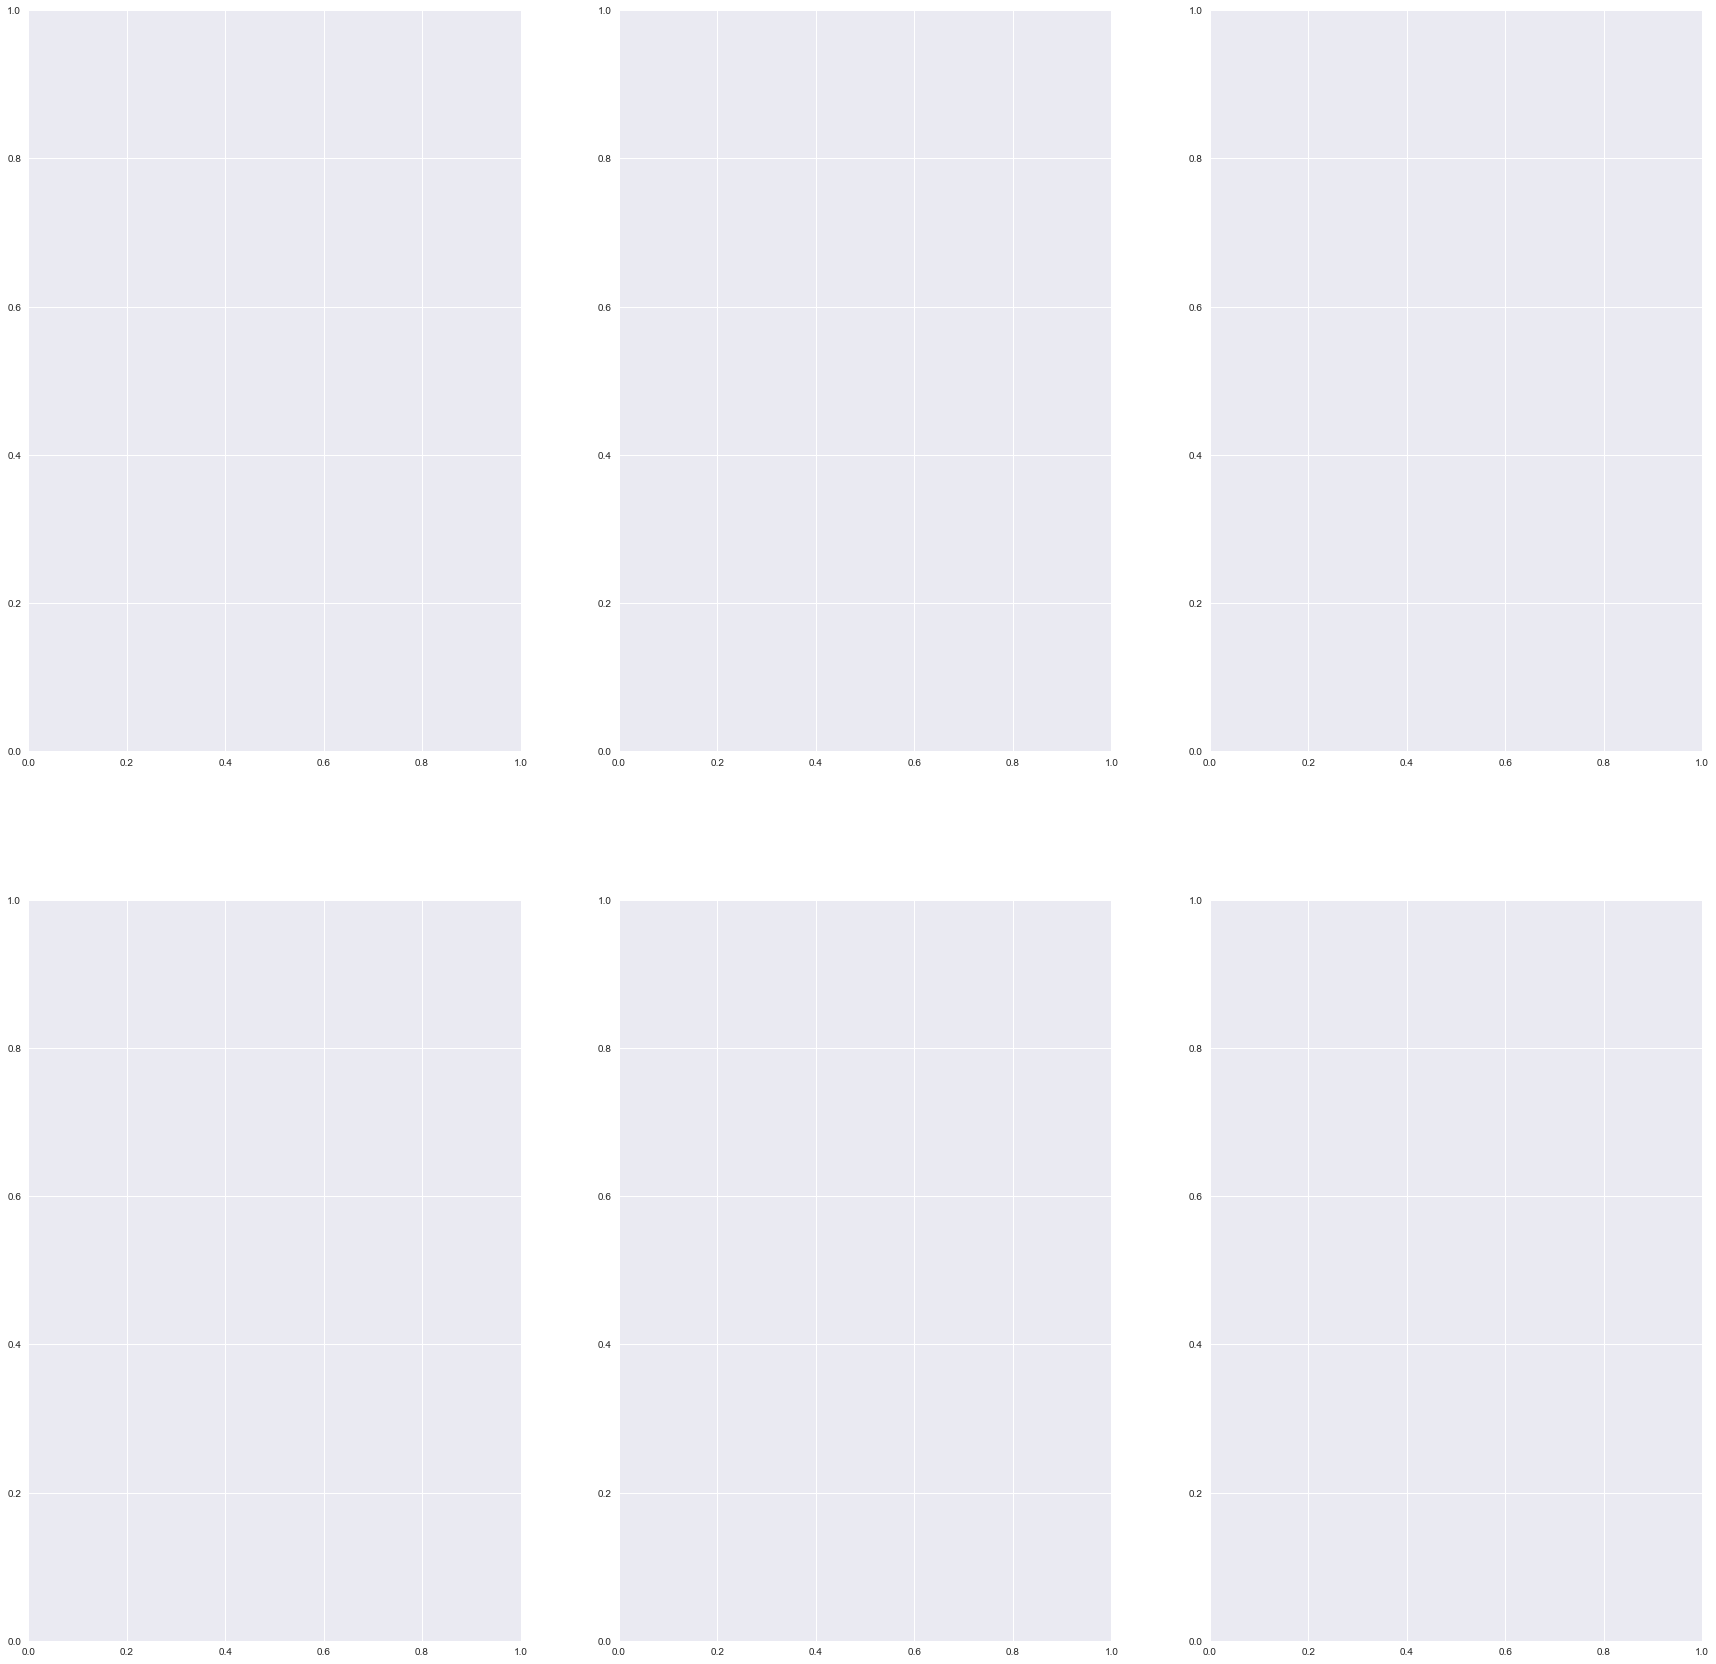

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(30, 30))
ax1= axs(1,1)
ax1.plot(performance_log_ZORO_Co_MD[:, 0], (performance_log_ZORO_Co_MD[:, 1]), linewidth=1, label='ZORO WITH COSAMP')
ax1.plot(performance_log_ZORO_Co_MD[:, 0], (performance_log_ZORO_Co_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH COSAMP')
ax1.set_xlabel('number of queries')
ax1.set_ylabel('$(f(x_{k})-f^{*})$')
ax1.set_title('COSAMP')
ax1.legend()

ax2=axs(1,2)
ax2.plot(performance_log_ZORO_IHT[:, 0], (performance_log_ZORO_IHT[:, 1]), linewidth=1, label='ZORO WITH IHT')
ax2.plot(performance_log_ZORO_IHT_MD[:, 0], (performance_log_ZORO_IHT_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH IHT')
ax2.set_xlabel('number of queries')
ax2.set_ylabel('$(f(x_{k})-f^{*})$')
ax2.set_title('IHT')
ax2.legend()

ax3=axs(2,1)
ax3.plot(performance_log_ZORO_Lasso[:, 0], (performance_log_ZORO_Lasso[:, 1]), linewidth=1, label='ZORO WITH LASSO')
ax3.plot(performance_log_ZORO_Lasso_MD[:, 0], (performance_log_ZORO_Lasso_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH LASSO')
ax3.set_xlabel('number of queries')
ax3.set_ylabel('$(f(x_{k})-f^{*})$')
ax3.set_title('LASSO')
ax3.legend()

ax4=axs(2,2)
ax4.plot(performance_log_ZORO_DLasso[:, 0], (performance_log_ZORO_DLasso[:, 1]), linewidth=1, label='ZORO WITH DE-BIASED LASSO')
ax4.plot(performance_log_ZORO_DLasso_MD[:, 0], (performance_log_ZORO_DLasso_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH DE-BIASED LASSO')
ax4.set_xlabel('number of queries')
ax4.set_ylabel('$(f(x_{k})-f^{*})$')
ax4.set_title('DE-BIASED LASSO')
ax4.legend()

ax4=axs(2,2)
ax4.plot(performance_log_ZORO_IHT_ad[:, 0], (performance_log_ZORO_IHT_ad[:, 1]), linewidth=1, label='ZORO WITH IHT AD LASSO')
ax4.plot(performance_log_ZORO_IHT_ad_MD[:, 0], (performance_log_ZORO_IHT_ad_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH IHT AD')
ax4.set_xlabel('number of queries')
ax4.set_ylabel('$(f(x_{k})-f^{*})$')
ax4.set_title('DE-BIASED LASSO')
ax4.legend()




plt.suptitle("Comparative Analysis of ZORO Algorithm Performance with Various Gradient Estimation and Descent Methods ", fontsize=16)
plt.tight_layout()
plt.show()


